<a href="https://colab.research.google.com/github/BrandonKaza32/FINAL-CAPESTONE-PROJECT/blob/main/Exploring_and_Preparing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Objectives**
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and Matplotlib

+ Exploratory Data Analysis
+ Preparing Data Feature Engineering



In [8]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

!pip install numpy pandas seaborn

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Exploratory Data Analysis
First lets read the SpaceX dataset into a Pandas dataframe and print its summary

In [10]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.



<Figure size 1000x600 with 0 Axes>

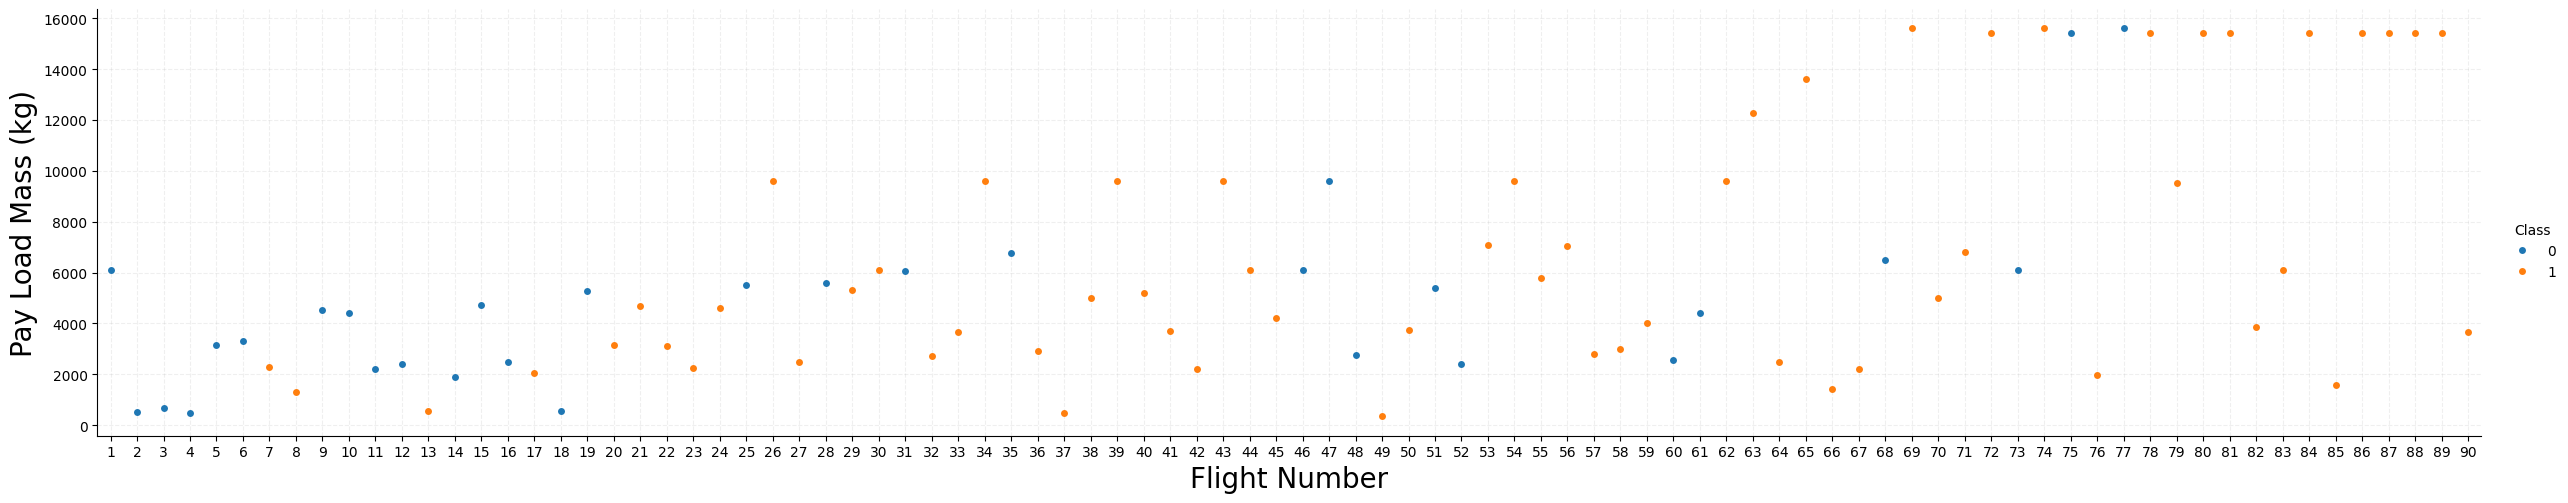

In [11]:
plt.figure(figsize=(10,6))
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay Load Mass (kg)",fontsize=20)
plt.grid(alpha=0.2, linestyle='--')
plt.show()

Next, lets drill down to each site visualize its detailed launch records.

###Task 1: Visualize the relationship between Flight Number and Launch Site

Use the function `catplot` to plot `FlightNumber` vs `LaunchSite`, set the parameter `x` parameter to `FlightNumber`, set the `y` to `Launch Site` and set the parameter `hue` to 'class'

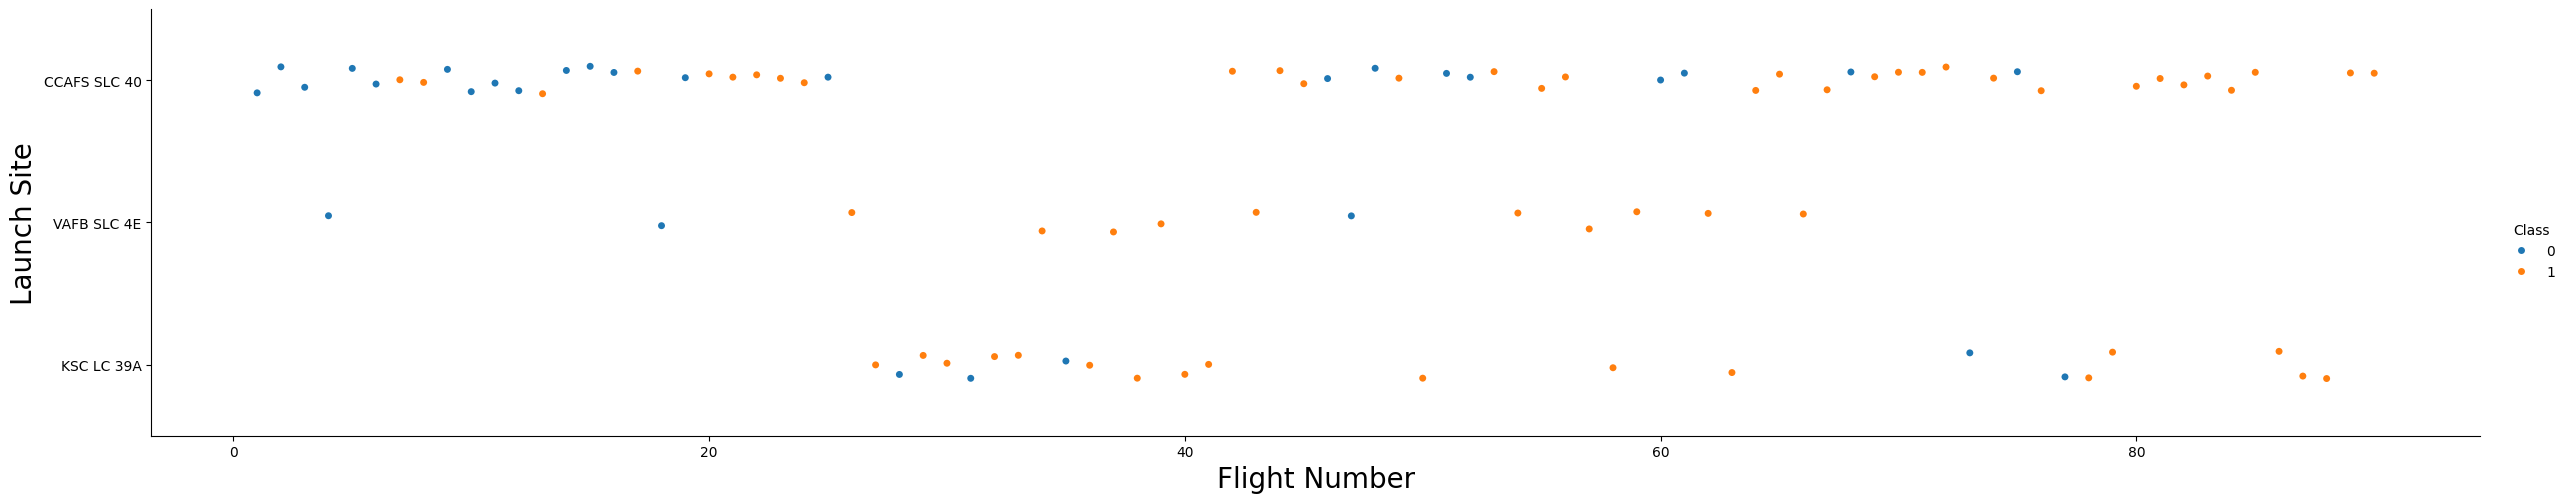

In [12]:
#Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue='Class', data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

###Task 2: Visualize the relationship between Payload Mass and Launch Site

We also want to on=bserve if there is any relationship between launch sites and their payload mass.

<Figure size 1000x800 with 0 Axes>

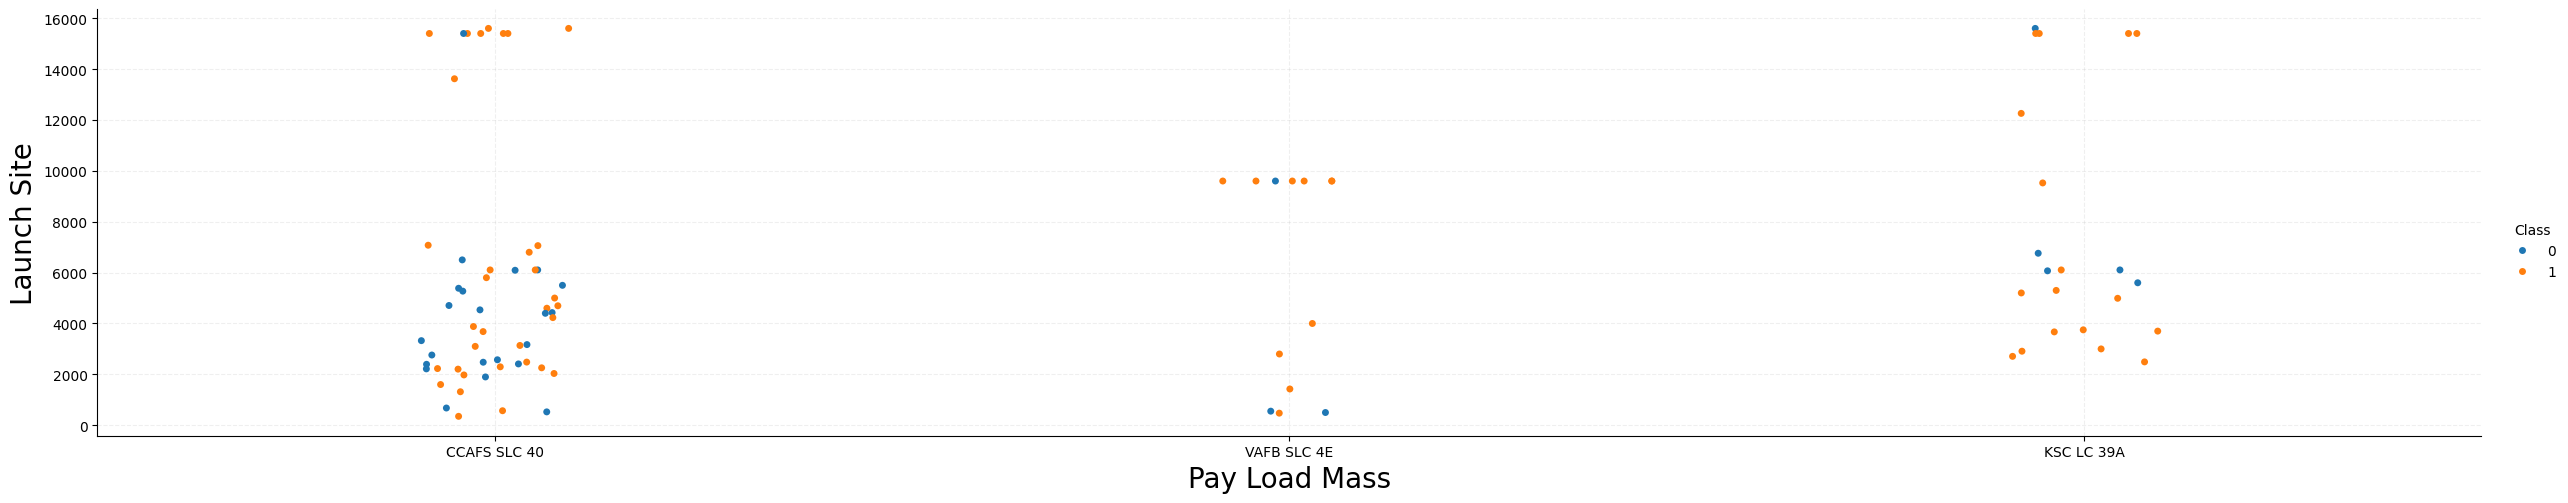

In [13]:
#Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(10,8))
sns.catplot(y="PayloadMass", x="LaunchSite", hue='Class', data=df, aspect=5)
plt.xlabel("Pay Load Mass", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.grid(alpha=0.2, linestyle='--')
plt.show()

In [14]:
Success_rateS = df.groupby(['LaunchSite'])['Class'].mean()
Success_rateS

,Class
LaunchSite,
CCAFS SLC 40,0.600000
KSC LC 39A,0.772727
VAFB SLC 4E,0.769231


###Task 3: Visualize the relationship between success rate of each orbit

Next, we want to visually check if there are any relationship between success rate and orbit type.

Lets create a `bar chart` for the success rate of each orbit.

In [15]:
# HINT use groupby method on Orbit column and get the mean of Class column
Success_rate = df.groupby(['Orbit'])['Class'].mean()
Success_rate

,Class
Orbit,
ES-L1,1.000000
GEO,1.000000
GTO,0.518519
HEO,1.000000
ISS,0.619048
LEO,0.714286
MEO,0.666667
PO,0.666667
SO,0.000000


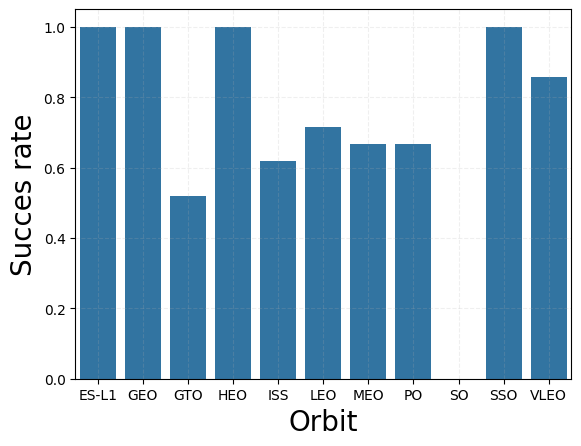

In [16]:
#Lets creat a bar chart for the success rate of each orbit
sns.barplot(x=Success_rate.index, y=Success_rate.values)
plt.xlabel("Orbit", fontsize=20)
plt.ylabel("Succes rate", fontsize=20)
plt.grid(alpha=0.2,linestyle='--')
plt.show()

###Task 4: Visualize the relationship between FlightNumber and Orbit type

For each orbit we want to see if there is any relationship between FlightNumber and Orbit type.

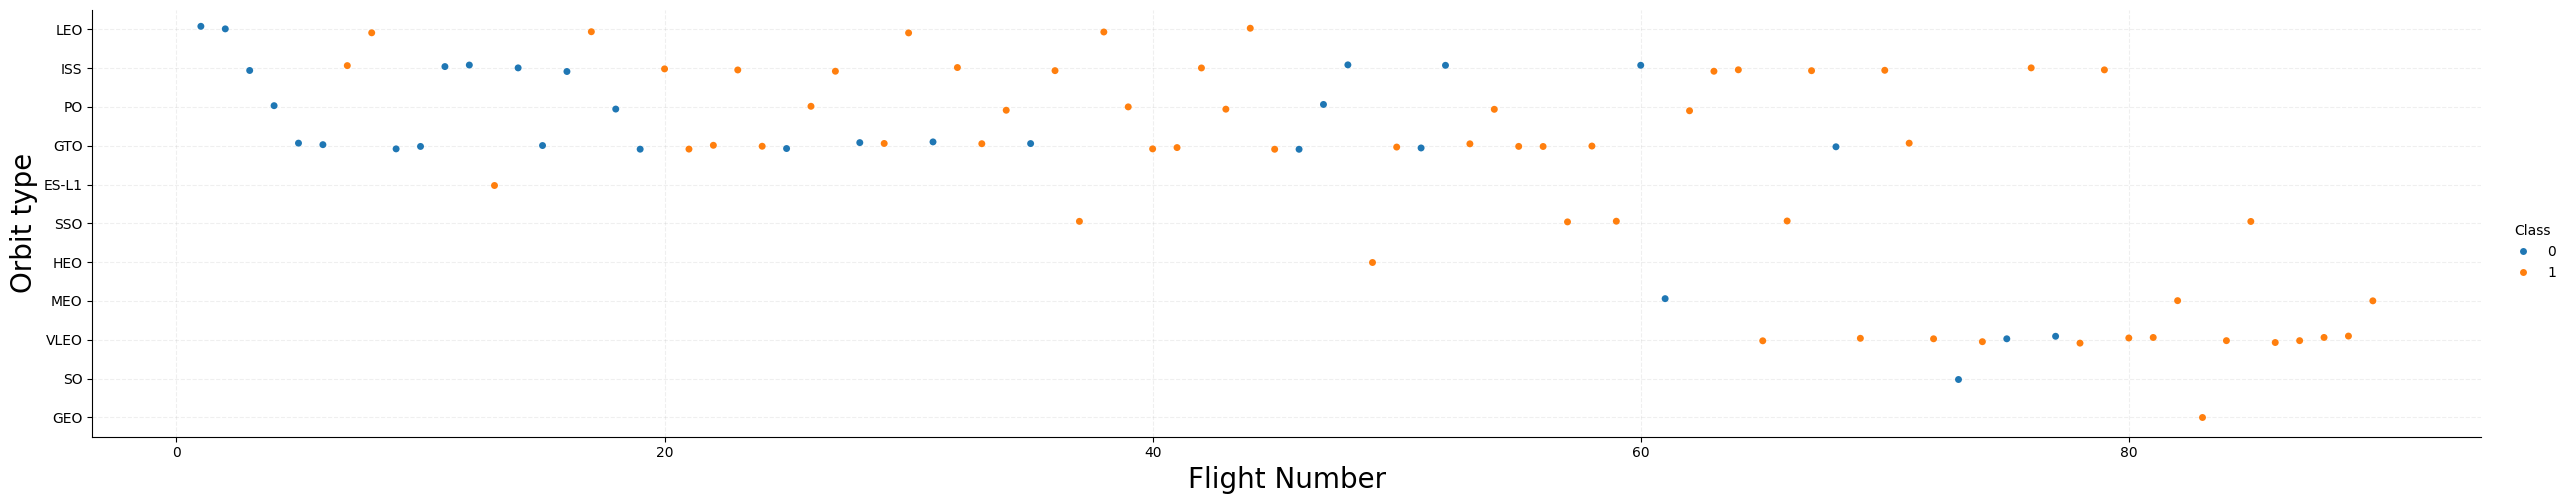

In [17]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue='Class', data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit type", fontsize=20)
plt.grid(alpha=0.2, linestyle='--')
plt.show()

###Task 5: Visualize thr relationship between Payload Mass and Orbit type
Similarly, we can plot the Payload Mass vs Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type.

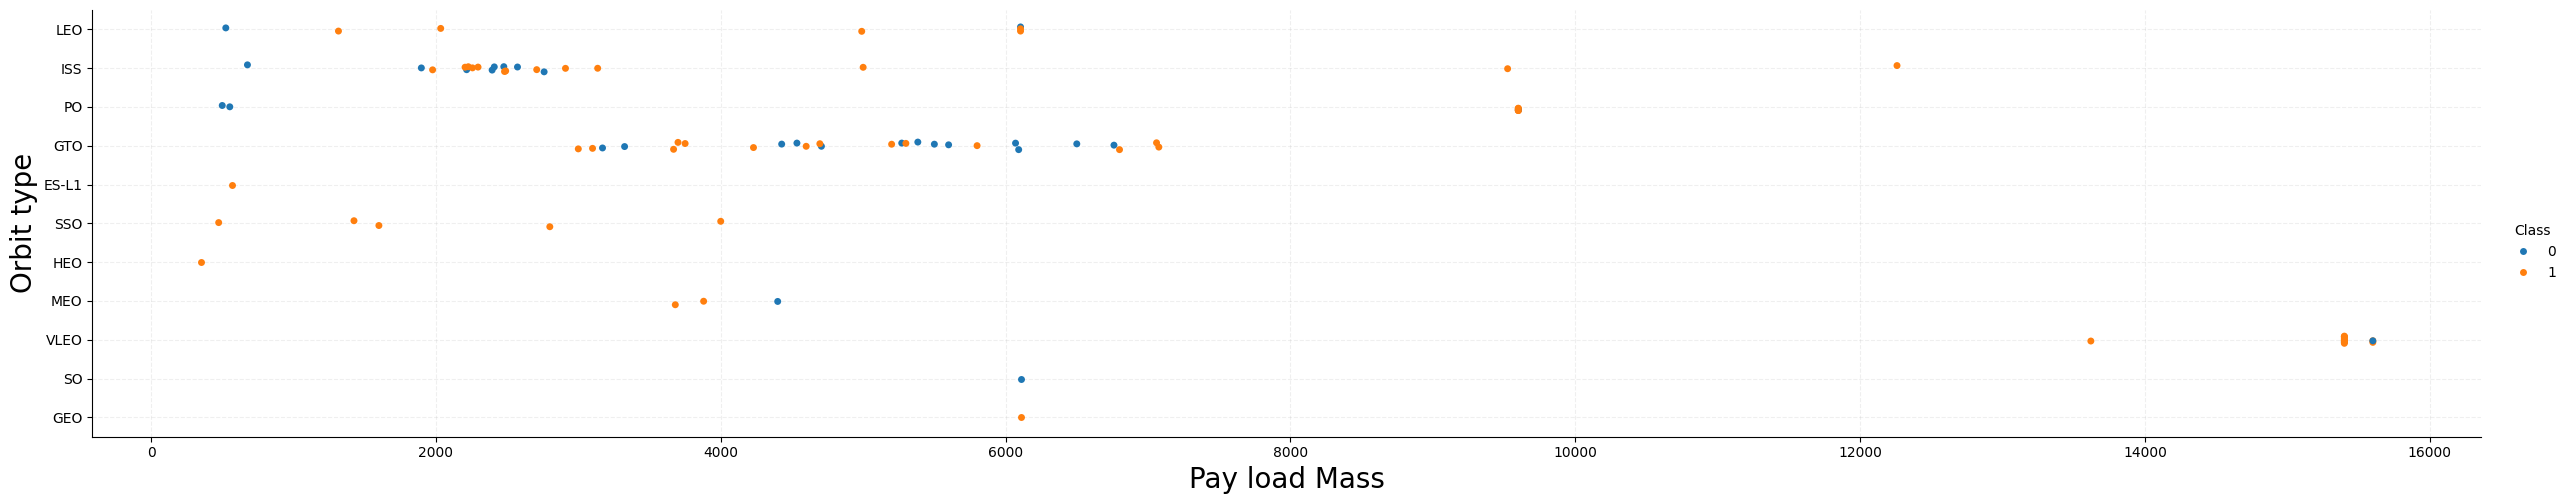

In [18]:
sns.catplot(y="Orbit", x="PayloadMass", hue='Class', data=df, aspect=5)
plt.xlabel("Pay load Mass", fontsize=20)
plt.ylabel("Orbit type", fontsize=20)
plt.grid(alpha=0.2, linestyle='--')
plt.show()

###Task 6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be `Year` and y axis to be average success rate, to get the average launch success trend .

The function will help you get the year from the date:

In [19]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


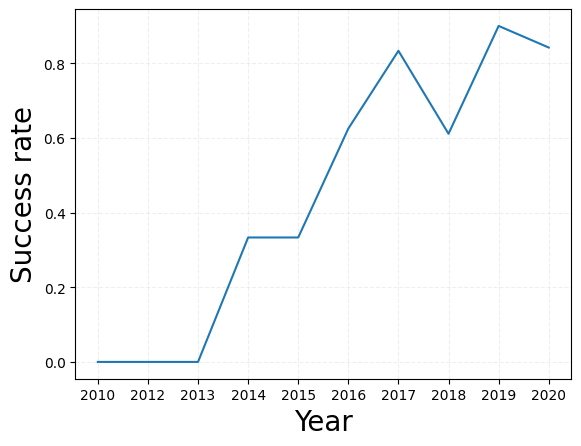

In [20]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
Success_rate = df.groupby(['Date'])['Class'].mean()
sns.lineplot(x=Success_rate.index, y=Success_rate.values)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success rate", fontsize=20)
plt.grid(alpha=0.2, linestyle='--')
plt.show()

##Feature Engineering

In [21]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


###Task 7: Create dummy variables to categorical columns

Use the function `get_dummies` and 'features' dataframe to apply OneHotEncoder to the column `Orbits`, `LaunchSite`, `LandingPad` and `Serial`.Assign the value to the variable 'features_one_hot', display the results using the method head.Your result dataframe must include all features including the encoded ones.

In [22]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


###Task 8:Cast all numeric columns to `float64`
Now that our `features_one_hot` dataframe only contains numbers, cast the entire dataframe to variable type `float64`

In [23]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')
display(features_one_hot.head())

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
features_one_hot.to_csv('dataset_part\_3.csv', index=False)